<h1 style="color:tomato;text-align:center;font-size:300%;font-family:verdana;"> Cancer Classification Assignment</h1>

___
For this assignment we'll try to predict a cancer class - benign or malignant.
We'll use:<br>
A. Decision Tree<br>
B. Random Forest<br>
C. Adaboost

<b>NOTE: all visualizations must have axes names and title and large enough to read</b>
____

<div class="alert alert-info"><strong>NOTE:</strong> Remember the steps:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>1. <b><u>Imports</u> -></b> Import relevant libraries and data sets</tt></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>2. <b><u>Exploration</u> -></b> Inspecting the data and exploration data analysis</tt></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>3. <b><u>Manipulation</u> -></b> Data alteration, adding/removing columns, etc. <i><b><span style="background-color:yellow">OPTIONAL</span></b></i></tt></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>4. <b><u>Algorithm</u> -></b> Splitting the data to train set and test set, training the algorithm. </tt></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>5. <b><u>Validation</u> -></b> Checking metric accuracies on the test set.</tt></font><br>
    &nbsp;&nbsp;&nbsp;&nbsp;<font color=black><tt>6. <b><u>Conclusion</u> -></b> Conclusion on performance, model selection, business problem.</tt></font></div>

___
# <u>Imports</u>
You may need to state %matplotlib inline, depending on your version of matplotlib

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings("ignore")

#### Import the data (cancer_classification.csv) and print the head of the data

In [2]:
data = pd.read_csv('cancer_classification.csv')
datacopy = pd.read_csv('cancer_classification.csv')
pd.set_option('max_columns',None)
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


____
# <u>Exploration</u>

#### Check the features data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Generate descriptive statistics and [transpose](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html) the data frame

In [4]:
data.transpose()
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Check for null values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64


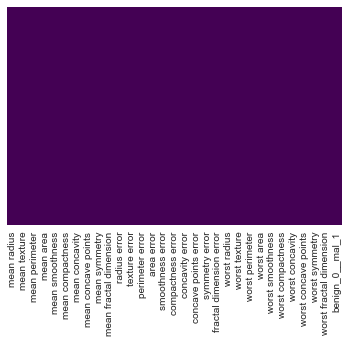

In [5]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### <u>Exploratory Data Analysis - visualization</u>

#### How many people have cancer? - countplot

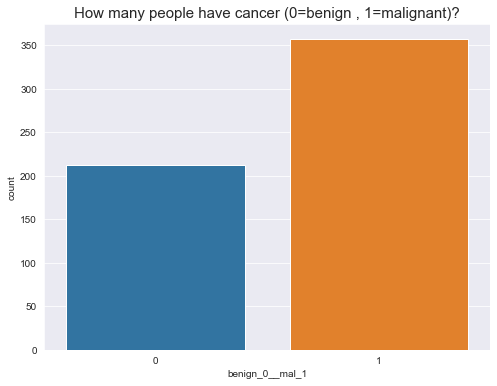

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data['benign_0__mal_1']);
plt.title("How many people have cancer (0=benign , 1=malignant)?",fontsize=15);

#### Use the mean area against the mean smoothness to see how many people have cancer - scatterplot

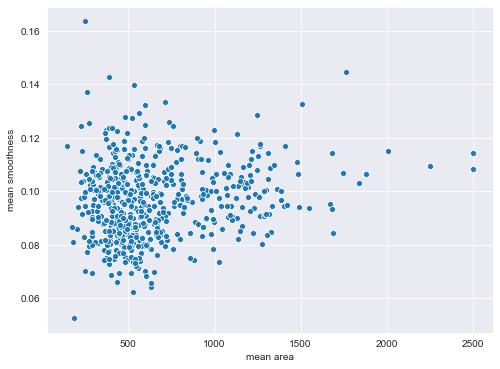

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['mean area'],data['mean smoothness']);


#### Use the mean smoothness against the mean texture to see how many people have cancer - scatterplot

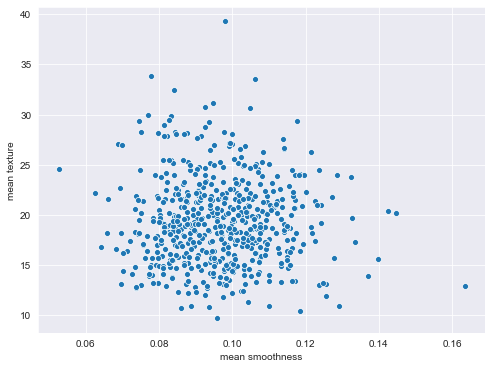

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['mean smoothness'],data['mean texture']);

#### Use the mean texture against the mean symetry to see how many people have cancer - scatterplot

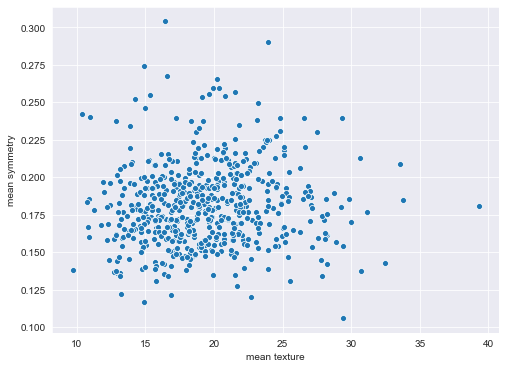

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['mean texture'],data['mean symmetry']);

#### Use the worst fractal dimension against the mean texture to see how many people have cancer - scatterplot

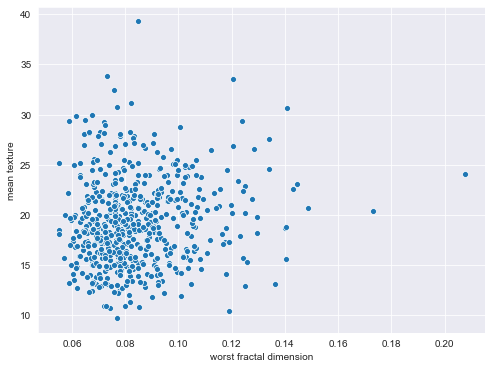

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data['worst fractal dimension'],data['mean texture']);

#### Use heatmap to show the [correlation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) between the features 
(use cmap='viridis' and print the annotations)

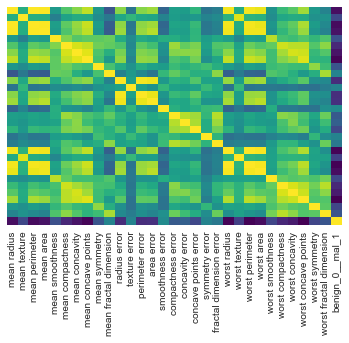

In [11]:
sns.heatmap(data.corr(),yticklabels=False,cbar=False,cmap='viridis');

#### Use heatmap to show the correlation between the mean features - all the features that have the word 'mean'
(use cmap='viridis' and print the annotations)<br>
hint: you need to save them first to a new variable

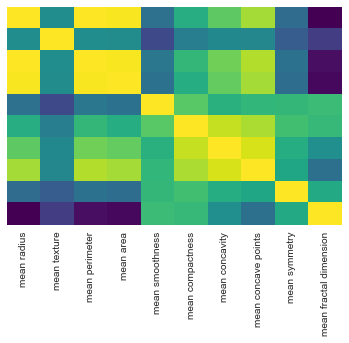

In [12]:
data_mean = data[['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension']]
sns.heatmap(data_mean.corr(),yticklabels=False,cbar=False,cmap='viridis');

____
# <u>Algorithm</u>

#### Split the data to X and y

In [13]:
X = data.drop('benign_0__mal_1', axis=1)
y = data['benign_0__mal_1']

#### Split the data to train set and test set (30% test set, random state = student's ID number)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

#### Scale the data
Remember: we don't want to suffer from data leakage so we fit and transform the training set, while only transforming the test set

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

___
## <u>Decision Tree - Gini</u>

In [16]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve

#### Instatiate the algorithm (max_depth=3, min_sample_leaf=2, random_state = ID number)

In [17]:
gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, random_state=101)

#### Fit the training set

In [18]:
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=101)

#### Print the tree with graphviz

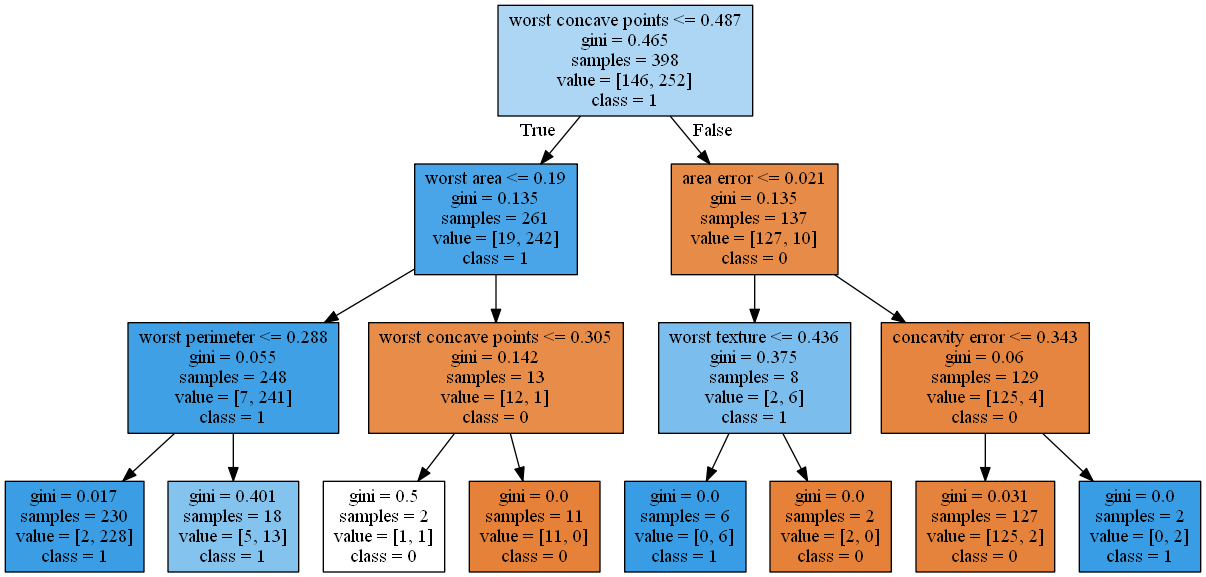

In [19]:
target_names = ['0', '1'] 
dot_data = tree.export_graphviz(gini, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=target_names, filled=True ) #creating the tree

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

## <u>Decision Tree - Gini - Accuracy Metrics</u>

#### Print the accuracy and the roc auc

In [20]:
y_pred = gini.predict(X_test)

print('accuracy:','',(accuracy_score(y_test,y_pred)*100).round(2),'%')
print('roc auc:','',(roc_auc_score(y_test,y_pred)*100).round(2),'%')

accuracy:  94.15 %
roc auc:  93.55 %


#### Print the Confusion Matrix and Classification Report

In [21]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 60   6]
 [  4 101]]

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



#### Print the ROC curve

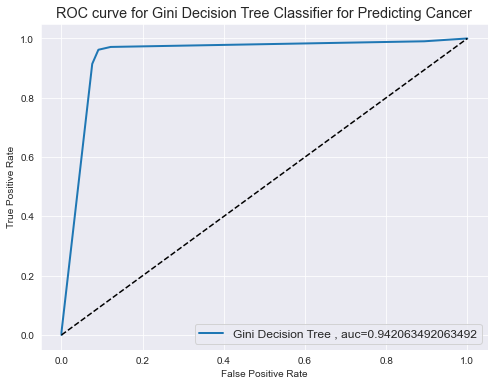

In [22]:
probs = gini.predict_proba(X_test) 
preds = probs[:,1:] 
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds) 
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr, linewidth=2,label="Gini Decision Tree , auc="+str(auc))
plt.plot([0,1], [0,1], 'k--' ) 
plt.rcParams['font.size'] = 12 
plt.title('ROC curve for Gini Decision Tree Classifier for Predicting Cancer') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(b=True)
plt.show()

___
## <u>Decision Tree - Entropy</u>

#### Repeat the steps for entropty as well including accuracy

In [23]:
entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2, random_state=101)

entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=101)

In [24]:
entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=101)

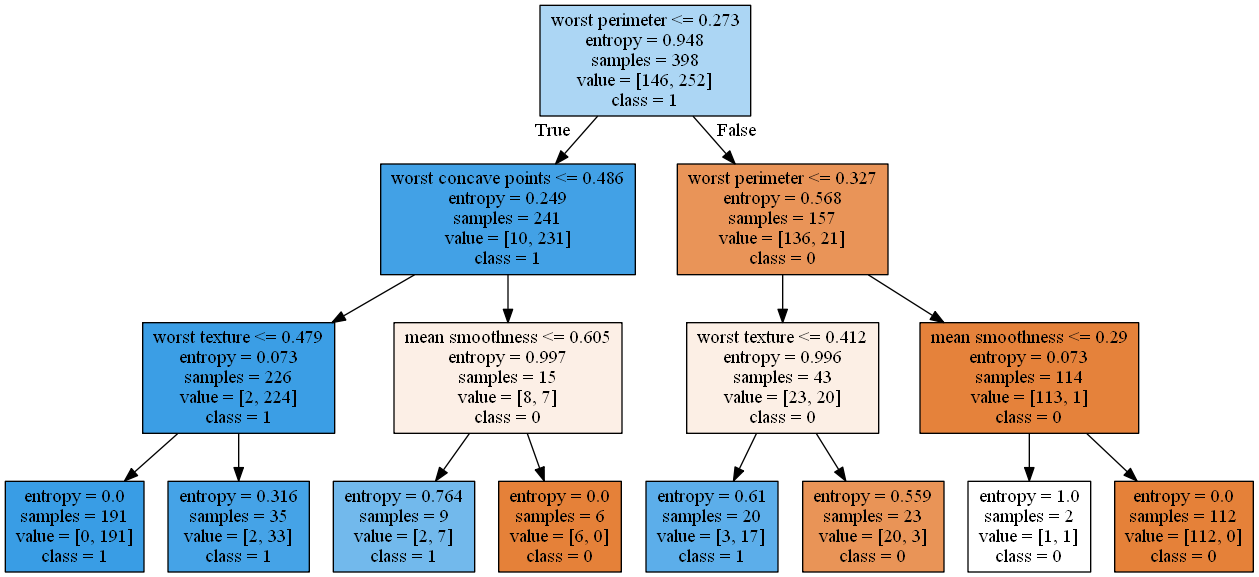

In [25]:
dot_data = tree.export_graphviz(entropy, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=target_names, filled=True )

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [26]:
y_pred = entropy.predict(X_test)

print('accuracy:','',(accuracy_score(y_test,y_pred)*100).round(2),'%')
print('roc auc:','',(roc_auc_score(y_test,y_pred)*100).round(2),'%')

accuracy:  93.57 %
roc auc:  92.79 %


In [27]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 59   7]
 [  4 101]]

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



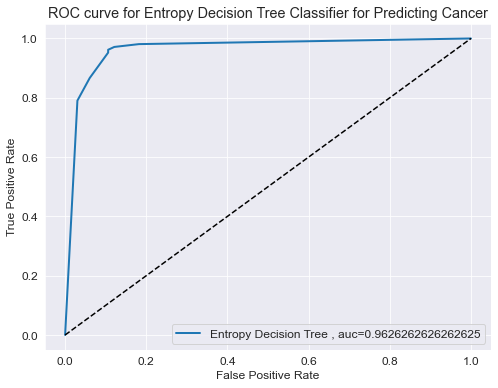

In [28]:
probs = entropy.predict_proba(X_test)
preds = probs[:,1:]
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2,label="Entropy Decision Tree , auc="+str(auc))
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Entropy Decision Tree Classifier for Predicting Cancer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(b=True)
plt.show()

___
## <u>Random Forest</u>

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Use grid search to fit the best parameters - might take a while depending on your CPU

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50, 100, 400, 700, 1000], 
             'max_depth':[2, 4, 10, 12, 16], 
             'criterion':['gini','entropy']} 

In [31]:
grid = GridSearchCV(RandomForestClassifier(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] criterion=gini, max_depth=2, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=2, n_estimators=50, score=0.887, total=   0.0s
[CV] criterion=gini, max_depth=2, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=2, n_estimators=50, score=0.963, total=   0.0s
[CV] criterion=gini, max_depth=2, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=2, n_estimators=50, score=0.963, total=   0.0s
[CV] criterion=gini, max_depth=2, n_estimators=50 ....................
[CV]  criterion=gini, max_depth=2, n_estimators=50, score=0.962, total=   0.0s
[CV] criterion=gini, max_depth=2, n_estimators=50 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, n_estimators=50, score=0.975, total=   0.0s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.887, total=   0.1s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.962, total=   0.1s
[CV] criterion=gini, max_depth=2, n_estimators=100 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=100, score=0.937, total=   0.1s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.887, total=   0.4s
[CV] criterion=

[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.900, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.963, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.963, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.975, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=400 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=400, score=0.987, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=700, score=0.887, total=   0.7s
[CV] criterion=gini, max_depth=10, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=700, score=0.963, total=   0.7s
[CV] cr

[CV]  criterion=gini, max_depth=16, n_estimators=400, score=0.987, total=   0.4s
[CV] criterion=gini, max_depth=16, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=700, score=0.887, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=700, score=0.963, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=700, score=0.975, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=700, score=0.975, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=700 ..................
[CV]  criterion=gini, max_depth=16, n_estimators=700, score=0.987, total=   0.7s
[CV] criterion=gini, max_depth=16, n_estimators=1000 .................
[CV]  criterion=gini, max_depth=16, n_estimators=1000, score=0.900, total=   1.0s
[CV] c

[CV]  criterion=entropy, max_depth=4, n_estimators=700, score=0.975, total=   0.8s
[CV] criterion=entropy, max_depth=4, n_estimators=700 ................
[CV]  criterion=entropy, max_depth=4, n_estimators=700, score=0.987, total=   0.8s
[CV] criterion=entropy, max_depth=4, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=4, n_estimators=1000, score=0.887, total=   1.1s
[CV] criterion=entropy, max_depth=4, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=4, n_estimators=1000, score=0.963, total=   1.1s
[CV] criterion=entropy, max_depth=4, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=4, n_estimators=1000, score=0.975, total=   1.1s
[CV] criterion=entropy, max_depth=4, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=4, n_estimators=1000, score=0.962, total=   1.1s
[CV] criterion=entropy, max_depth=4, n_estimators=1000 ...............
[CV]  criterion=entropy, max_depth=4, n_estimators=1000, score=0.987, to

[CV]  criterion=entropy, max_depth=12, n_estimators=1000, score=0.963, total=   1.1s
[CV] criterion=entropy, max_depth=12, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=12, n_estimators=1000, score=0.975, total=   1.1s
[CV] criterion=entropy, max_depth=12, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=12, n_estimators=1000, score=0.975, total=   1.1s
[CV] criterion=entropy, max_depth=12, n_estimators=1000 ..............
[CV]  criterion=entropy, max_depth=12, n_estimators=1000, score=0.987, total=   1.1s
[CV] criterion=entropy, max_depth=16, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=50, score=0.900, total=   0.1s
[CV] criterion=entropy, max_depth=16, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=50, score=0.963, total=   0.1s
[CV] criterion=entropy, max_depth=16, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=16, n_estimators=50, score=0.975,

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.9min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000]},
             verbose=3)

#### What are the grid's [best parameters](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)?

In [32]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 50}

#### Print the accuracy and roc auc

In [33]:
grid_pred = grid.predict(X_test)
print('accuracy:','',(accuracy_score(y_test,grid_pred)*100).round(2),'%')
print('roc auc:','',(roc_auc_score(y_test,grid_pred)*100).round(2),'%')

accuracy:  95.91 %
roc auc:  95.54 %


#### Print the Confusion Matrix and Classification Report

In [34]:
print(confusion_matrix(y_test,grid_pred))
print()
print(classification_report(y_test,grid_pred))

[[ 62   4]
 [  3 102]]

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        66
           1       0.96      0.97      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### Print the ROC curve

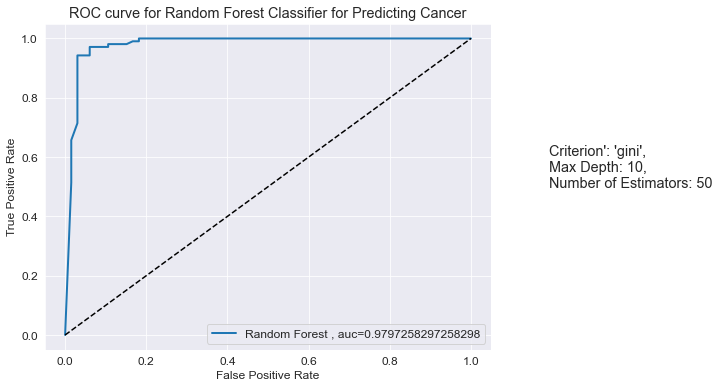

In [35]:
probs = grid.predict_proba(X_test)
preds = probs[:,1:]
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2,label="Random Forest , auc="+str(auc))
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest Classifier for Predicting Cancer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.figtext(1, 0.5, "Criterion': 'gini', \nMax Depth: 10, \nNumber of Estimators: 50", size='large')
plt.legend(loc=4)
plt.grid(b=True)
plt.show()

#### Optional - print the feature importance of the selected model

In [36]:
rfc=RandomForestClassifier(n_estimators = 50, max_depth = 10, criterion='gini',random_state=101)
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)

In [37]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(rfc.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
22,worst perimeter,0.155124
27,worst concave points,0.112932
7,mean concave points,0.107239
20,worst radius,0.098518
23,worst area,0.095981
0,mean radius,0.067257
2,mean perimeter,0.066278
6,mean concavity,0.047883
26,worst concavity,0.034623
13,area error,0.034474


___
## <u>Adaboost</u>

In [38]:
from sklearn.ensemble import AdaBoostClassifier

#### Instantiate the model with 200 estimators and repeat all the steps of fit, predict, accuracy matrics and feature importance (optional)

In [39]:
clf = AdaBoostClassifier(n_estimators=200, random_state=101)

In [40]:
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=101)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
print('accuracy:','',(accuracy_score(y_test,y_pred)*100).round(2),'%')
print('roc auc:','',(roc_auc_score(y_test,y_pred)*100).round(2),'%')

accuracy:  96.49 %
roc auc:  96.02 %


In [43]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[ 62   4]
 [  2 103]]

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.96      0.98      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



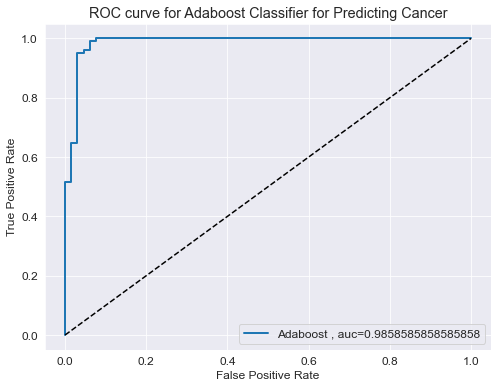

In [44]:
probs = clf.predict_proba(X_test)
preds = probs[:,1:]
fpr, tpr, thresholds = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2,label="Adaboost , auc="+str(auc))
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Adaboost Classifier for Predicting Cancer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(b=True)
plt.show()

In [45]:
pd.concat((pd.DataFrame(X.columns, columns = ['variable']), 
           pd.DataFrame(clf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
21,worst texture,0.105
23,worst area,0.095
24,worst smoothness,0.085
13,area error,0.080
27,worst concave points,0.075
1,mean texture,0.055
7,mean concave points,0.055
17,concave points error,0.045
19,fractal dimension error,0.040
29,worst fractal dimension,0.040


___
## <u>Conclusion</u>

#### What is the best algorithm? (Decision Tree Gini, Decision Tree Entropy, Random Forest, Adaboost) - answer in details

The best algorithm is AdaBoost because when we look at the results of the accurasy and roc auc of every algorithm we can clearly see that the results of the Adaboost are the best.

The results for the Adaboost are: (accuracy:  96.49 % ,  roc auc:  96.02 %)

Unlike the results for the other algorithms: 
Gini: (accuracy:  94.15 % , roc auc:  93.55 %) , Entropy: (accuracy:  accuracy:  93.57 % , roc auc:  92.79 %), RandomForest: (accuracy:  95.91 % , roc auc:  95.54 %)

We can also see the difference between the ROC curve of every algorithm, the Adaboost algorithm is the best because it is the closest to the left top edge